In [1]:
%run /g/data/e14/cp3790/Charuni/ModelExperiment/model-run-function-definitions.ipynb

import xesmf as xe

## Temperature

In [2]:
TEMP_VAR = "air_temperature"

#Alt 
airtemp_alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/alt-result-{}/um_pverd_*.nc")  

In [3]:
# Con

# bundle info
airtemp_con_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    '/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-{}/um_pverd_*.nc')  

In [4]:
for year in airtemp_alt_year_xr_map.keys():
    next_year =  year + 1
    var_xr = airtemp_alt_year_xr_map[year]
    time_slice = slice(
            "{}-06".format(year),
            "{}-06".format(next_year),
    )
    var_xr_slice = var_xr.sel(time=time_slice)
    airtemp_alt_year_xr_map[year] = var_xr_slice
    
for year in airtemp_con_year_xr_map.keys():
    next_year =  year + 1
    var_xr = airtemp_con_year_xr_map[year]
    time_slice = slice(
            "{}-06".format(year),
            "{}-06".format(next_year),
    )
    var_xr_slice = var_xr.sel(time=time_slice)
    airtemp_con_year_xr_map[year] = var_xr_slice

In [5]:
# Diff
airtemp_diff_year_xr_map = get_diff_year_xr_map(airtemp_alt_year_xr_map, airtemp_con_year_xr_map)

# Untested v

airtemp_year_phases_xr = get_year_phases_xr(airtemp_alt_year_xr_map, airtemp_diff_year_xr_map)

airtemp_sig_da = get_sig_da(airtemp_year_phases_xr.sel(latitude=-35, method='nearest'), dim1='pressure', dim2='longitude')

Following years in alt_xr_map is not in con_xr_map: {1999, 2000, 2001, 2003, 2004, 2006}
Following years in con_xr_map is not in alt_xr_map: {1994, 1995, 1996}
1982 has 8 event_month coords after resampling. Skipping this year!
Checking coords of 1981 - has 'longtitude'


KeyError: 1982

In [ ]:
## monthly panels

def multiple_plots():
    nrow = 1
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9))  
    
    data = airtemp_year_phases_xr.sel(latitude=-35, method='nearest').mean(dim='time')

    phases = ['Build up', 'Peak', 'Die down']

    for col in range(ncol):
        cur_data = data[col]
        contour = ax[col].contourf(
            cur_data.longitude,
            cur_data.pressure,
            cur_data.values,
            levels=np.arange(-2.05, 2.1, 0.1),
            add_colorbar=False,
            cmap=plt.cm.get_cmap('bwr'), 
        )

        phase_mask_mean = airtemp_sig_da[col]
        ax[col].contourf(
            phase_mask_mean.longitude,
            phase_mask_mean.pressure,
            phase_mask_mean.values,
            levels=[0.00, 0.05, 1.00],
            hatches=['.', None],
            colors='none',
            add_colorbar=False,
        )
        ax[col].set_title(phases[col])
        ax[col].invert_yaxis()
        ax[col].axvline(x=150, linestyle='--', color='green')
        
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-2.0, 2.1, 0.5),
                        fraction=0.035,aspect=25)
    cbar.set_label(label=u'Air temperature anomaly (\u00B0C)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_vertical_temp_phases.png')
    

multiple_plots()

## Potential Temperature

In [5]:
airtemp_con_xr = get_year_and_months_xr(airtemp_con_year_xr_map, airtemp_con_year_xr_map)

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1995 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking coords of 2011 - has 'longtitude'
Checking coords of 2017 - has 'longtitude'


In [6]:
airtemp_ens_xr = get_year_and_months_xr(airtemp_alt_year_xr_map, airtemp_alt_year_xr_map)

Checking coords of 1981 - has 'longtitude'
1982 has 8 time coords after resampling. Skipping this year!
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 1999 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
2006 has 4 time coords after resampling. Skipping this year!
Checking coords of 2011 - has 'longtitude'
Checking coords of

In [7]:
## could I apply the similar code to convert temperature to potential temperature?

con_theta_xr_map = {}
for year in airtemp_con_year_xr_map.keys():
    con_theta_xr_map[year] = airtemp_con_year_xr_map[year]*((1000/airtemp_con_year_xr_map[year].pressure)**0.286)

In [8]:
alt_theta_xr_map = {}
for year in airtemp_alt_year_xr_map.keys():
    alt_theta_xr_map[year] = airtemp_alt_year_xr_map[year]*((1000/airtemp_alt_year_xr_map[year].pressure)**0.286)

In [14]:
con_theta_xr_map[1981]

<xarray.DataArray (time: 395, pressure: 16, latitude: 50, longitude: 110)>
dask.array<mul, shape=(395, 16, 50, 110), dtype=float64, chunksize=(31, 16, 50, 110), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1981-06-01T12:00:00 ... 1982-06-30T12:00:00
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
  * pressure   (pressure) float64 100.0 150.0 200.0 250.0 ... 925.0 950.0 1e+03

In [13]:
alt_theta_xr_map[1981]

<xarray.DataArray (time: 395, pressure: 16, latitude: 50, longitude: 110)>
dask.array<mul, shape=(395, 16, 50, 110), dtype=float64, chunksize=(31, 16, 50, 110), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1981-06-01T12:00:00 ... 1982-06-30T12:00:00
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
  * pressure   (pressure) float64 100.0 150.0 200.0 250.0 ... 925.0 950.0 1e+03

In [9]:
theta_diff_year_xr_map = get_diff_year_xr_map(alt_theta_xr_map, con_theta_xr_map)

Following years in alt_xr_map is not in con_xr_map: {1999, 2000, 2001, 2003, 2004, 2006}
Following years in con_xr_map is not in alt_xr_map: {1994, 1995, 1996}
1982 has 8 event_month coords after resampling. Skipping this year!


In [10]:
theta_diff_xr = xr.concat([coord_to_dim(year_xr, 'event_month') for year_xr in theta_diff_year_xr_map.values()],
                             dim="year")

In [11]:
theta_diff_xr

<xarray.DataArray (year: 16, event_month_dim: 13, pressure: 16, latitude: 50,
                   longitude: 110)>
dask.array<concatenate, shape=(16, 13, 16, 50, 110), dtype=float64, chunksize=(1, 1, 16, 50, 110), chunktype=numpy.ndarray>
Coordinates:
  * longitude    (longitude) float32 135.2 135.8 136.2 ... 188.8 189.2 189.8
  * latitude     (latitude) float32 -52.75 -52.25 -51.75 ... -28.75 -28.25
  * pressure     (pressure) float64 100.0 150.0 200.0 ... 925.0 950.0 1e+03
    event_month  (year, event_month_dim) datetime64[ns] 1981-06-30 ... 2018-0...
Dimensions without coordinates: year, event_month_dim

In [18]:
# monthly  means for all of the years, for a small region

theta_diff_mon_xr = theta_diff_xr.sel(latitude=slice(-50, -33), longitude=slice(143, 153)).mean(dim='year')

In [19]:
theta_diff_mon_xr

<xarray.DataArray (event_month_dim: 13, pressure: 16, latitude: 34,
                   longitude: 20)>
dask.array<mean_agg-aggregate, shape=(13, 16, 34, 20), dtype=float64, chunksize=(1, 16, 34, 20), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 143.2 143.8 144.2 144.8 ... 151.8 152.2 152.8
  * latitude   (latitude) float32 -49.75 -49.25 -48.75 ... -34.25 -33.75 -33.25
  * pressure   (pressure) float64 100.0 150.0 200.0 250.0 ... 925.0 950.0 1e+03
Dimensions without coordinates: event_month_dim

In [200]:
theta_diff_mon_avg = theta_diff_mon_xr.mean(dim=('latitude', 'longitude'))
theta_diff_mon_avg

<xarray.DataArray (event_month_dim: 13, pressure: 16)>
dask.array<mean_agg-aggregate, shape=(13, 16), dtype=float64, chunksize=(1, 16), chunktype=numpy.ndarray>
Coordinates:
  * pressure  (pressure) float64 100.0 150.0 200.0 250.0 ... 925.0 950.0 1e+03
Dimensions without coordinates: event_month_dim

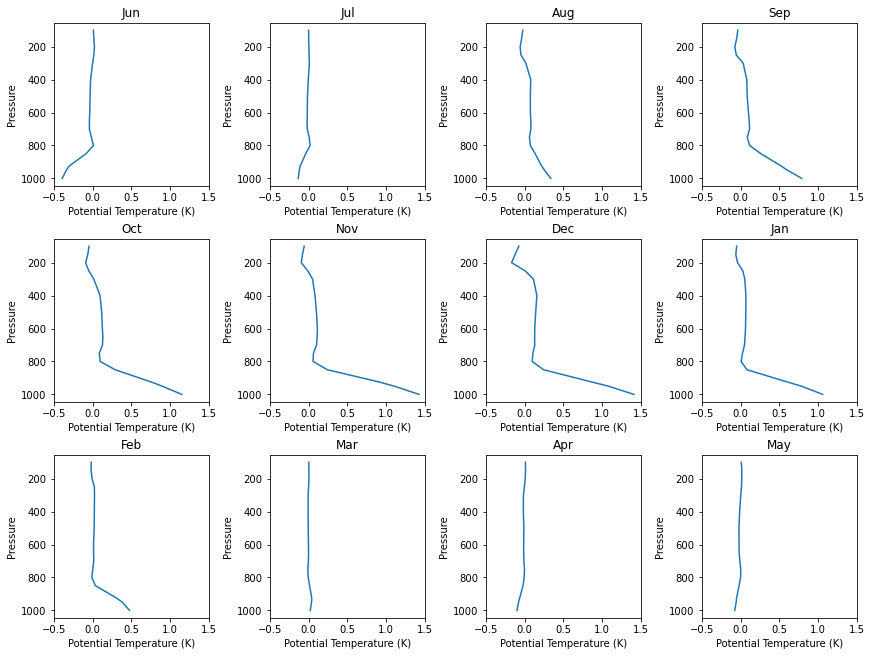

In [208]:
## monthly panels of theta anomalies

def theta_con_multiple_plots_grid():
    nrow = 3
    ncol = 4
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(12,9), constrained_layout=True)  
    
    data = theta_diff_mon_avg

    month_labels = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']
    month_nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

    month_num_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            data_idx = month_nums[month_num_idx]
            cur_data = data[data_idx]
            contour = ax[row, col].plot(
                #cur_data.pressure,
                cur_data.values,
                cur_data.pressure,
                #levels=np.arange(-0.375, 1.5, 0.25),
            )

            ax[row, col].set_title(month_labels[data_idx])
            ax[row, col].set_ylabel('Pressure')
            ax[row, col].set_xlabel('Potential Temperature (K)')
            ax[row, col].set_xlim(-0.5, 1.5)
            ax[row, col].invert_yaxis()
            month_num_idx += 1
    
    fig.patch.set_facecolor('white')
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/potential_temp_anom_monthly.png')  

theta_con_multiple_plots_grid()

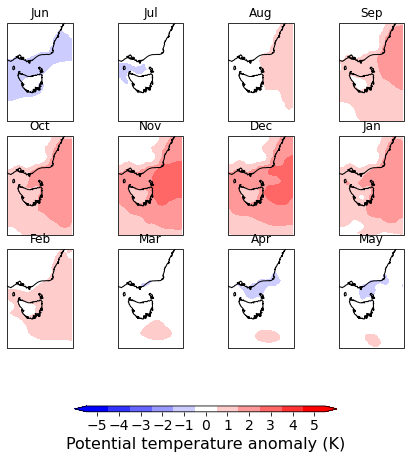

In [209]:
## Monthly maps of potential temperature anomalies at 1000 hPa

def multiple_plots():
    nrow = 3
    ncol = 4
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = theta_diff_mon_xr.isel(pressure=15)
    
    month_labels = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']
    month_nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    
    month_num_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            data_idx = month_nums[month_num_idx]
            cur_data = data[data_idx]
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(-5.5, 6, 1),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('bwr', 11),
                extend='both'
            )
            ax[row, col].coastlines()
            ax[row, col].set_extent([143, 153, -48, -33],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(month_labels[data_idx])
            
            month_num_idx += 1

            
    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           
    ax_flat = ax.flatten(order='C')
    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[12:]):
        fig.delaxes(axis) 
        
    #fig.tight_layout()         
    
    plt.subplots_adjust(left=0.125,
                bottom=0.3, 
                right=0.5, 
                top=0.9, 
                wspace=0.1, 
                hspace=0.15)
    
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-5,6,1),
                        fraction=0.015,aspect=45)
    cbar.set_label(label='Potential temperature anomaly (K)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/theta_anom_1000hpa.png')
    

multiple_plots()

In [68]:
airtemp_diff_year_xr_map = get_diff_year_xr_map(airtemp_alt_year_xr_map, airtemp_con_year_xr_map)

Following years in alt_xr_map is not in con_xr_map: {1999, 2000, 2001, 2003, 2004, 2006}
Following years in con_xr_map is not in alt_xr_map: {1994, 1995, 1996}
1982 has 8 event_month coords after resampling. Skipping this year!


In [102]:
time_coord_xr = airtemp_alt_year_xr_map[2017].resample(time='1M').mean() 
time_coord_xr

<xarray.DataArray 'air_temperature' (time: 13, pressure: 16, latitude: 50,
                                     longitude: 110)>
dask.array<stack, shape=(13, 16, 50, 110), dtype=float32, chunksize=(1, 16, 50, 110), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2017-06-30 2017-07-31 ... 2018-06-30
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
  * pressure   (pressure) float64 100.0 150.0 200.0 250.0 ... 925.0 950.0 1e+03

In [103]:
xr.concat(
    [time_coord_xr.isel(time=m) for m in range(0,13)],
    dim='month'
)

<xarray.DataArray 'air_temperature' (month: 13, pressure: 16, latitude: 50,
                                     longitude: 110)>
dask.array<concatenate, shape=(13, 16, 50, 110), dtype=float32, chunksize=(1, 16, 50, 110), chunktype=numpy.ndarray>
Coordinates:
    time       (month) datetime64[ns] 2017-06-30 2017-07-31 ... 2018-06-30
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
  * pressure   (pressure) float64 100.0 150.0 200.0 250.0 ... 925.0 950.0 1e+03
Dimensions without coordinates: month

In [140]:
xr.concat([detect_and_rename_coords(coord_to_dim(year_xr, 'event_month')) for year_xr in airtemp_diff_year_xr_map.values()], dim="year")

xr has 'longitude'. Not renaming.
xr has 'longitude'. Not renaming.
xr has 'longitude'. Not renaming.
xr has 'longitude'. Not renaming.
xr has 'longitude'. Not renaming.
xr has 'longitude'. Not renaming.
xr has 'longitude'. Not renaming.
xr has 'longitude'. Not renaming.
xr has 'longitude'. Not renaming.
xr has 'longitude'. Not renaming.
xr has 'longitude'. Not renaming.
xr has 'longitude'. Not renaming.
xr has 'longitude'. Not renaming.
xr has 'longitude'. Not renaming.
xr has 'longitude'. Not renaming.
xr has 'longitude'. Not renaming.


<xarray.DataArray 'air_temperature' (year: 16, event_month_dim: 13,
                                     pressure: 16, latitude: 50, longitude: 110)>
dask.array<concatenate, shape=(16, 13, 16, 50, 110), dtype=float32, chunksize=(1, 1, 16, 50, 110), chunktype=numpy.ndarray>
Coordinates:
    event_month  (year, event_month_dim) datetime64[ns] 1981-06-30 ... 2018-0...
  * longitude    (longitude) float32 135.2 135.8 136.2 ... 188.8 189.2 189.8
  * latitude     (latitude) float32 -52.75 -52.25 -51.75 ... -28.75 -28.25
  * pressure     (pressure) float64 100.0 150.0 200.0 ... 925.0 950.0 1e+03
Dimensions without coordinates: year, event_month_dim

In [112]:
air_temp_diff_xr = xr.concat([coord_to_dim(year_xr, 'event_month') for year_xr in airtemp_diff_year_xr_map.values()],
                             dim="year")

In [126]:
# annual  means for each month, for a small region

air_temp_diff_mon_xr = air_temp_diff_xr.sel(latitude=slice(-45, -30), longitude=slice(143, 153)).mean(dim='year')

In [127]:
air_temp_diff_mon_xr

<xarray.DataArray 'air_temperature' (event_month_dim: 13, pressure: 16,
                                     latitude: 30, longitude: 20)>
dask.array<mean_agg-aggregate, shape=(13, 16, 30, 20), dtype=float32, chunksize=(1, 16, 30, 20), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 143.2 143.8 144.2 144.8 ... 151.8 152.2 152.8
  * latitude   (latitude) float32 -44.75 -44.25 -43.75 ... -31.25 -30.75 -30.25
  * pressure   (pressure) float64 100.0 150.0 200.0 250.0 ... 925.0 950.0 1e+03
Dimensions without coordinates: event_month_dim

In [128]:
air_temp_diff_mon_avg = air_temp_diff_mon_xr.mean(dim=('latitude', 'longitude'))
air_temp_diff_mon_avg

<xarray.DataArray 'air_temperature' (event_month_dim: 13, pressure: 16)>
dask.array<mean_agg-aggregate, shape=(13, 16), dtype=float32, chunksize=(1, 16), chunktype=numpy.ndarray>
Coordinates:
  * pressure  (pressure) float64 100.0 150.0 200.0 250.0 ... 925.0 950.0 1e+03
Dimensions without coordinates: event_month_dim

In [129]:
theta_anom = air_temp_diff_mon_avg*((1000/air_temp_diff_mon_avg.pressure)**0.286)
theta_anom

<xarray.DataArray (event_month_dim: 13, pressure: 16)>
dask.array<mul, shape=(13, 16), dtype=float64, chunksize=(1, 16), chunktype=numpy.ndarray>
Coordinates:
  * pressure  (pressure) float64 100.0 150.0 200.0 250.0 ... 925.0 950.0 1e+03
Dimensions without coordinates: event_month_dim

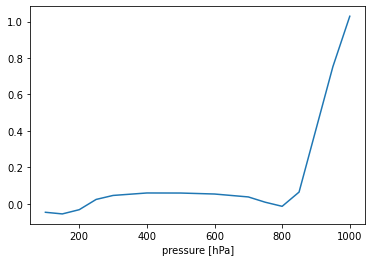

In [142]:
theta_anom.isel(event_month_dim=7).plot()

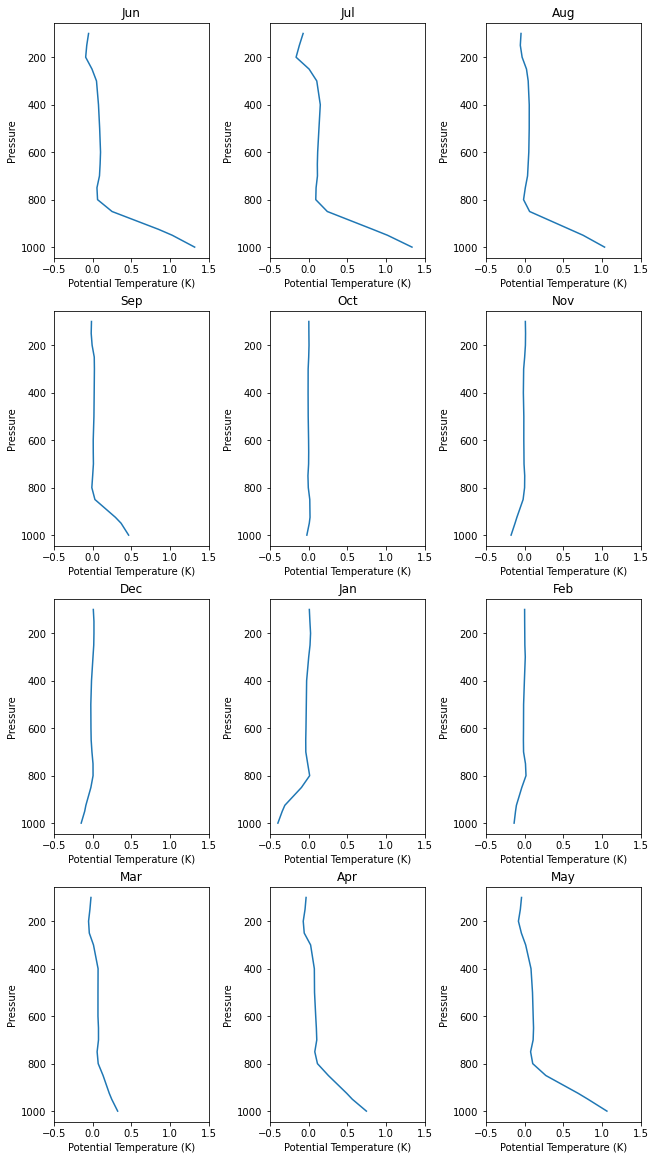

In [150]:
## monthly panels of theta anomalies

def theta_con_multiple_plots_grid():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(9, 16), constrained_layout=True)  
    
    data = theta_anom

    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_nums = [5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4]

    month_num_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            data_idx = month_nums[month_num_idx]
            cur_data = data[data_idx]
            contour = ax[row, col].plot(
                #cur_data.pressure,
                cur_data.values,
                cur_data.pressure,
                #levels=np.arange(-0.375, 1.5, 0.25),
            )

            ax[row, col].set_title(month_labels[data_idx])
            ax[row, col].set_ylabel('Pressure')
            ax[row, col].set_xlabel('Potential Temperature (K)')
            ax[row, col].set_xlim(-0.5, 1.5)
            ax[row, col].invert_yaxis()
            month_num_idx += 1
    
    fig.patch.set_facecolor('white')
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/potential_temp_anom_monthly.png')  

theta_con_multiple_plots_grid()

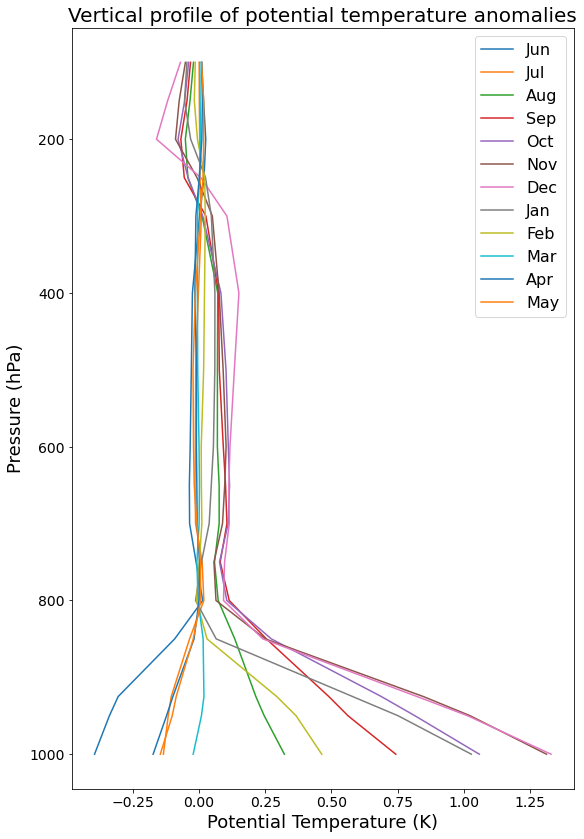

In [145]:
## monthly panels

def theta_anom_multiple_lines_single_plot():

    plt.figure(figsize=(9, 14)) 
    #plt.subplots(111, figsize=(9, 16))  
    
    data = theta_anom

    month_labels = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']
    month_nums = [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

    for i, month_num in enumerate(month_nums):
        cur_data = data[month_num]
        plt.plot(
            cur_data.values,
            cur_data.pressure,
            label=month_labels[i]
        )

    plt.gca().invert_yaxis()
    plt.title("Vertical profile of potential temperature anomalies", fontsize=20)
    plt.ylabel('Pressure (hPa)', fontsize=18)
    plt.xlabel('Potential Temperature (K)', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=16)
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/potential_temp_anom.png')  
    #plt.show()

theta_anom_multiple_lines_single_plot()

In [28]:
# Convert to monthly data by averaging across year 

#T_con_monthly = airtemp_con_xr.mean(dim=['latitude', 'longitude', 'year'])
T_con_monthly = airtemp_con_xr.sel(latitude=slice(-45, -30), longitude=slice(143, 153)).mean(dim='year')
T_ens_monthly = airtemp_ens_xr.sel(latitude=slice(-45, -30), longitude=slice(143, 153)).mean(dim='year')

In [31]:
# Average across Tasman Sea 

T_con_monthly_tasman = T_con_monthly.mean(dim=('latitude', 'longitude'))
T_ens_monthly_tasman = T_ens_monthly.mean(dim=('latitude', 'longitude'))

In [32]:
# Average theta in Tasman Sea 

theta_con_monthly = T_con_monthly_tasman*((1000/T_con_monthly_tasman.pressure)**0.286) 
theta_ens_monthly = T_ens_monthly_tasman*((1000/T_ens_monthly_tasman.pressure)**0.286) 

In [8]:
# Theta across all grid points 

theta_con_monthly_3d = T_con_monthly*((1000/T_con_monthly.pressure)**0.286)

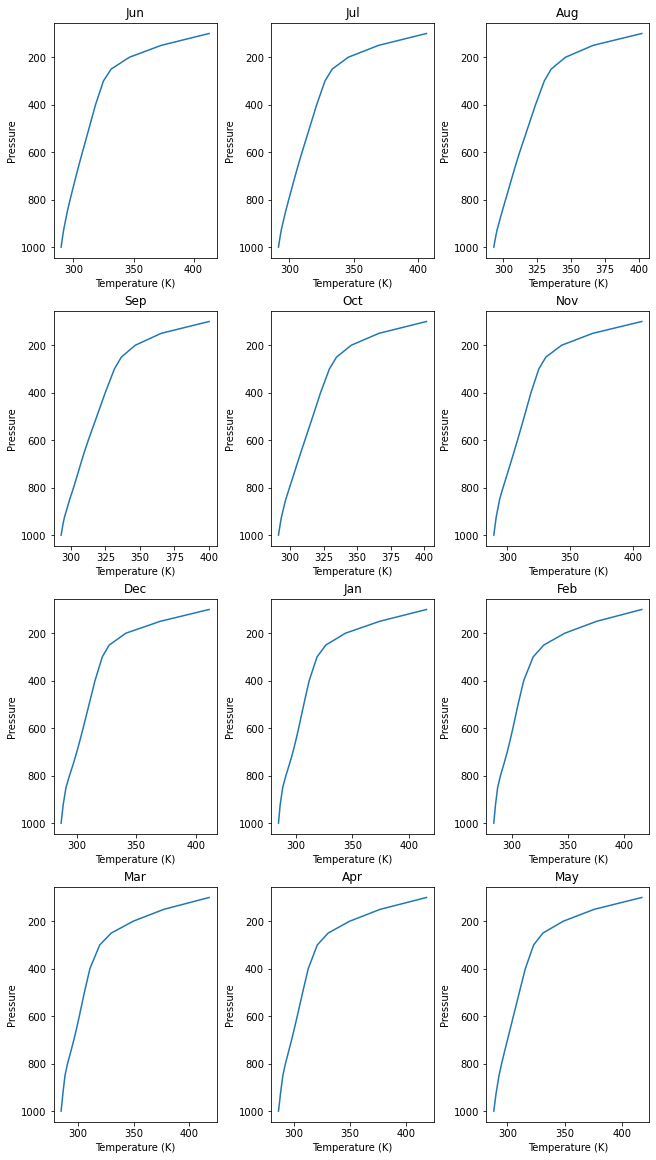

In [225]:
## monthly panels

def theta_con_multiple_plots_grid():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(9, 16), constrained_layout=True)  
    
    data = theta_con_monthly

    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_nums = [5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4]

    month_num_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            data_idx = month_nums[month_num_idx]
            cur_data = data[data_idx]
            contour = ax[row, col].plot(
                #cur_data.pressure,
                cur_data.values,
                cur_data.pressure,
                #levels=np.arange(-2.05, 2.1, 0.1),
            )

            ax[row, col].set_title(month_labels[data_idx])
            ax[row, col].set_ylabel('Pressure')
            ax[row, col].set_xlabel('Temperature (K)')
            ax[row, col].invert_yaxis()
            month_num_idx += 1
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/con_potential_temp_invert.png')  

theta_con_multiple_plots_grid()

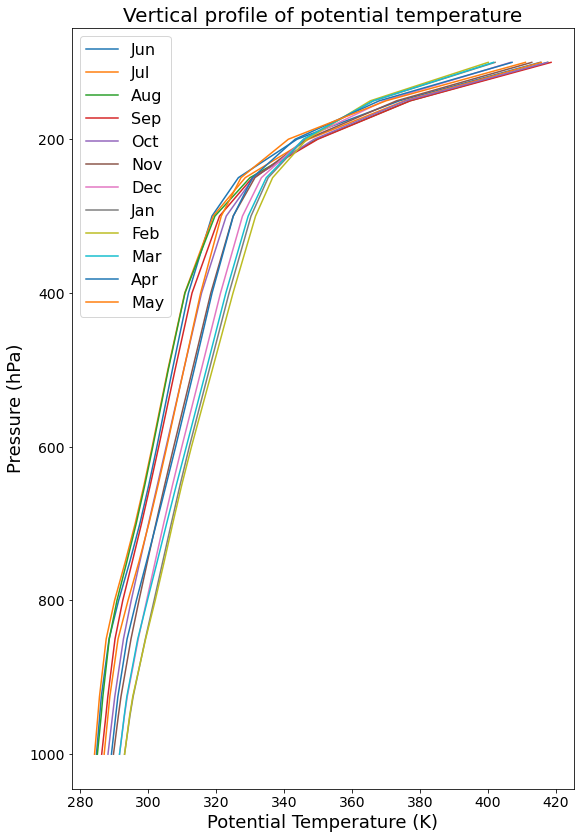

In [234]:
## monthly panels

def theta_con_multiple_lines_single_plot():

    plt.figure(figsize=(9, 14)) 
    #plt.subplots(111, figsize=(9, 16))  
    
    data = theta_con_monthly

    month_labels = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']
    month_nums = [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

    for i, month_num in enumerate(month_nums):
        cur_data = data[month_num]
        plt.plot(
            cur_data.values,
            cur_data.pressure,
            label=month_labels[i]
        )

    plt.gca().invert_yaxis()
    plt.title("Vertical profile of potential temperature", fontsize=20)
    plt.ylabel('Pressure (hPa)', fontsize=18)
    plt.xlabel('Potential Temperature (K)', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=16)
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/con_potential_temp_tasman_single.png')  
    #plt.show()

theta_con_multiple_lines_single_plot()

## Richardson Number

Variables: Potential temperature, u wind, v wind, z

Constants: g, 

In [210]:
TEMP_VAR = "x_wind"

#Alt 
xwind_alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/alt-result-{}/um_pverc_*.nc")  

# Con

# bundle info
xwind_con_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    '/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-{}/um_pverc_*.nc')  

In [211]:
for year in xwind_alt_year_xr_map.keys():
    next_year =  year + 1
    var_xr = xwind_alt_year_xr_map[year]
    time_slice = slice(
            "{}-06".format(year),
            "{}-06".format(next_year),
    )
    var_xr_slice = var_xr.sel(time=time_slice)
    xwind_alt_year_xr_map[year] = var_xr_slice
    
for year in xwind_con_year_xr_map.keys():
    next_year =  year + 1
    var_xr = xwind_con_year_xr_map[year]
    time_slice = slice(
            "{}-06".format(year),
            "{}-06".format(next_year),
    )
    var_xr_slice = var_xr.sel(time=time_slice)
    xwind_con_year_xr_map[year] = var_xr_slice

In [212]:
xwind_con_xr = get_year_and_months_xr(xwind_con_year_xr_map, xwind_con_year_xr_map)

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longitude_0' -> renaming coords...
Checking coords of 1987 - has 'longitude_0' -> renaming coords...
Checking coords of 1988 - has 'longitude_0' -> renaming coords...
Checking coords of 1989 - has 'longitude_0' -> renaming coords...
Checking coords of 1990 - has 'longitude_0' -> renaming coords...
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longitude_0' -> renaming coords...
Checking coords of 1993 - has 'longitude_0' -> renaming coords...
Checking coords of 1994 - has 'longitude_0' -> renaming coords...
Checking coords of 1995 - has 'longitude_0' -> renaming coords...
Checking coords of 1996 - has 'longitude_0' -> renaming coords...
Checking coords of 1998 - has 'longtitude'
Checking coords of 2005 - has 'longtitu

In [213]:
xwind_con_monthly = xwind_con_xr.mean(dim=['latitude', 'longitude', 'year'])

In [214]:
TEMP_VAR = "y_wind"

#Alt 
ywind_alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/alt-result-{}/um_pverc_*.nc")  

# Con

# bundle info
ywind_con_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    '/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-{}/um_pverc_*.nc')  

In [215]:
for year in ywind_alt_year_xr_map.keys():
    next_year =  year + 1
    var_xr = ywind_alt_year_xr_map[year]
    time_slice = slice(
            "{}-06".format(year),
            "{}-06".format(next_year),
    )
    var_xr_slice = var_xr.sel(time=time_slice)
    ywind_alt_year_xr_map[year] = var_xr_slice
    
for year in ywind_con_year_xr_map.keys():
    next_year =  year + 1
    var_xr = ywind_con_year_xr_map[year]
    time_slice = slice(
            "{}-06".format(year),
            "{}-06".format(next_year),
    )
    var_xr_slice = var_xr.sel(time=time_slice)
    ywind_con_year_xr_map[year] = var_xr_slice

In [216]:
ywind_con_xr = get_year_and_months_xr(ywind_con_year_xr_map, ywind_con_year_xr_map)

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longitude_0' -> renaming coords...
Checking coords of 1987 - has 'longitude_0' -> renaming coords...
Checking coords of 1988 - has 'longitude_0' -> renaming coords...
Checking coords of 1989 - has 'longitude_0' -> renaming coords...
Checking coords of 1990 - has 'longitude_0' -> renaming coords...
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longitude_0' -> renaming coords...
Checking coords of 1993 - has 'longitude_0' -> renaming coords...
Checking coords of 1994 - has 'longitude_0' -> renaming coords...
Checking coords of 1995 - has 'longitude_0' -> renaming coords...
Checking coords of 1996 - has 'longitude_0' -> renaming coords...
Checking coords of 1998 - has 'longtitude'
Checking coords of 2005 - has 'longtitu

In [217]:
ywind_con_monthly = ywind_con_xr.mean(dim=['latitude', 'longitude', 'year'])

In [ ]:
# theta_con_monthly_3d

In [31]:
xwind_con_monthly_3d = xwind_con_xr.sel(latitude=slice(-45, -30), longitude=slice(143, 153)).mean(dim='year')
ywind_con_monthly_3d = ywind_con_xr.sel(latitude=slice(-45, -30), longitude=slice(143, 153)).mean(dim='year')

In [225]:
TEMP_VAR = "air_pressure_at_sea_level"

#Alt 
alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pverb_{}.nc")  

# Con

# bundle info
bundle_1980 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1980/um_pverb_*.nc')
bundle_1999 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1999/um_pverb_*.nc')
con_bundles = {
    '1980': {
        'xr': bundle_1980,
        'start': 1981,
        'end': 1998,
    },
    '1999': {
        'xr': bundle_1999,
        'start': 2000,
        'end': 2018,
    }
}

con_year_xr_map = get_con_year_xr_map(alt_year_xr_map, con_bundles, TEMP_VAR)

mslp_con_months_xr = get_year_months_xr(alt_year_xr_map, alt_year_xr_map)

# Diff
diff_year_xr_map = get_diff_year_xr_map(alt_year_xr_map, con_year_xr_map)

In [226]:
mslp_year_months_xr = get_year_and_months_xr(con_year_xr_map, con_year_xr_map)

Checking coords of 1981 - has 'longtitude'
Checking coords of 1982 - has 'longtitude'
Checking coords of 1983 - has 'longtitude'
Checking coords of 1984 - has 'longtitude'
Checking coords of 1985 - has 'longtitude'
Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1991 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'
Checking coords of 1997 - has 'longtitude'
Checking coords of 1998 - has 'longtitude'
Checking coords of 2000 - has 'longtitude'
Checking coords of 2001 - has 'longtitude'
Checking coords of 2002 - has 'longtitude'
Checking coords of 2003 - has 'longtitude'
Checking coords of 2004 - has 'longtitude'
Checking coords of 2005 - has 'longtitude'
Checking co

In [227]:
mslp_con_monthly =  mslp_year_months_xr.mean(dim=['latitude', 'longitude', 'year'])

In [228]:
## Deriving z from pressure levels using hydrostatic balance equation 
## scale height is approximated as 7000 m

z = -7000 * xr.ufuncs.log(xwind_con_monthly.pressure/mslp_con_monthly)
z

/local/e14/cp3790/tmp/ipykernel_2562774/1811235403.py:4: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  z = -7000 * xr.ufuncs.log(xwind_con_monthly.pressure/mslp_con_monthly)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/xarray/core/dataarray.py:3078: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  da = self.__array_wrap__(f(self.variable.data, *args, **kwargs))


<xarray.DataArray (pressure: 16, month: 13)>
dask.array<mul, shape=(16, 13), dtype=float64, chunksize=(16, 1), chunktype=numpy.ndarray>
Coordinates:
  * pressure  (pressure) float64 100.0 150.0 200.0 250.0 ... 925.0 950.0 1e+03
Dimensions without coordinates: month

In [231]:
v = xr.ufuncs.sqrt((xwind_con_monthly**2) + (ywind_con_monthly**2))

/local/e14/cp3790/tmp/ipykernel_2562774/2320256652.py:1: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  v = xr.ufuncs.sqrt((xwind_con_monthly**2) + (ywind_con_monthly**2))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/xarray/core/dataarray.py:3078: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  da = self.__array_wrap__(f(self.variable.data, *args, **kwargs))


In [238]:
v[0][0].values

array(21.72361, dtype=float32)

In [242]:
z.isel(month=0)[0]

<xarray.DataArray ()>
dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    pressure  float64 100.0

In [245]:
wind_shear = (v[0][0] - v[0][1])/(z.isel(month=0)[0] - z.isel(month=0)[1])
wind_shear.values

array(-0.00183229)

In [264]:
wind_shear = (v.isel(month=0)[14] - v.isel(month=0)[15])/(z.isel(month=0)[14] - z.isel(month=0)[15])
wind_shear.values

array(0.00351388)

In [311]:
wind_shear_month_xrs = []
for m in range(13):
    wind_shears = []
    for n in range (v["pressure"].size - 1):
        wind_shear_xr = (v.isel(month=m)[n] - v.isel(month=m)[n+1])/(z.isel(month=m)[n] - z.isel(month=m)[n+1])
        wind_shears.append(wind_shear_xr)
    wind_shear_month_xr = xr.concat(wind_shears, dim="height")
    wind_shear_month_xrs.append(wind_shear_month_xr)
wind_shear_months_xr = xr.concat(wind_shear_month_xrs, dim="month")

In [314]:
wind_shear_months_xr.isel(month=0).values

array([-0.00183229, -0.00047394,  0.00176059,  0.00275336,  0.00261188,
        0.00214298,  0.00193807,  0.00186145,  0.00182435,  0.00179277,
        0.001758  ,  0.00171991,  0.00200814,  0.002503  ,  0.00351388])

In [ ]:
(z.isel(month=0).tail(15).values)/1000

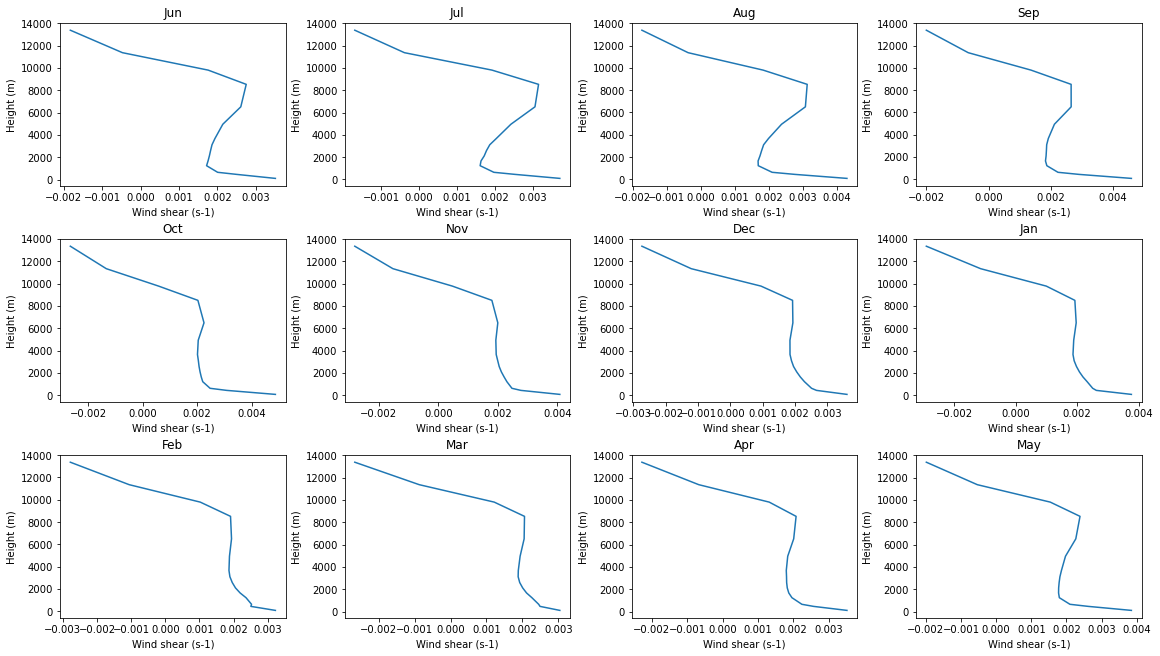

In [317]:
## monthly panels

def wind_shear_multiple_plots_grid():
    nrow = 3
    ncol = 4
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16, 9), constrained_layout=True)  
    
    data = wind_shear_months_xr
    data2 = z

    month_labels = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']
    
    month_num_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            data_idx = month_num_idx
            cur_data = data[data_idx]
            cur_data2 = data2.isel(month=data_idx).tail(15)
            contour = ax[row, col].plot(
                cur_data.values,
                cur_data2.values,
                #levels=np.arange(-2.05, 2.1, 0.1),
            )

            ax[row, col].set_title(month_labels[data_idx])
            ax[row, col].set_ylabel('Height (m)')
            ax[row, col].set_xlabel('Wind shear (s-1)')
            #ax[row, col].invert_yaxis()
            month_num_idx += 1
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/wind_shear_monthly.png')  

wind_shear_multiple_plots_grid()

In [28]:
mslp_con_monthly_3d = mslp_year_months_xr.sel(latitude=slice(-45, -30), longitude=slice(143, 153)).mean(dim='year')

Calculating different components of the Richardson Number (z, theta_diff and v)

In [223]:
## Deriving z from pressure levels using hydrostatic balance equation 
## scale height is approximated as 7000 m

z = -7000 * xr.ufuncs.log(xwind_con_monthly_3d.pressure/mslp_con_monthly_3d)
z

NameError: name 'xwind_con_monthly_3d' is not defined

In [156]:
theta_diff = (theta_con_monthly_3d - theta_con_monthly_3d.sel(pressure=1000))/theta_con_monthly_3d.sel(pressure=1000)

In [180]:
v = abs((xwind_con_monthly_3d**2) + (ywind_con_monthly_3d**2))

In [181]:
v_out = v.rename(longitude='lon', latitude='lat')

In [154]:
## Regrid z and theta_diff to the grid of xwind and ywind (v)

import xesmf as xe

In [155]:
ds_out = xr.Dataset(
    {
        "lat": (["lat"], np.arange(-45.0, -29.5, 0.5)),
        "lon": (["lon"], np.arange(143, 153.5, 0.5)),
    }
)

In [158]:
z_lat_lon = z.rename(longitude='lon', latitude='lat') # if it isn't renamed, regridder errors out
z_ds = z_lat_lon.to_dataset(name='z') # regridder only works on datasets
regridder = xe.Regridder(z_ds, ds_out, "bilinear") # build regridder 
z_out = regridder(z_ds) # apply regridder 

In [160]:
theta_diff_lat_lon = theta_diff.rename(longitude='lon', latitude='lat') # if it isn't renamed, regridder errors out
theta_diff_ds = theta_diff_lat_lon.to_dataset(name='theta_diff') # regridder only works on datasets
regridder_theta = xe.Regridder(theta_diff_ds, ds_out, "bilinear") # build regridder 
theta_diff_out = regridder_theta(theta_diff_ds) # apply regridder 

In [187]:
## calculating Richardson Number

rich_number = (9.8 * z_out.z * theta_diff_out.theta_diff)/v_out

In [188]:
rich_number

<xarray.DataArray (pressure: 16, month: 13, lat: 31, lon: 21)>
dask.array<truediv, shape=(16, 13, 31, 21), dtype=float64, chunksize=(16, 1, 31, 21), chunktype=numpy.ndarray>
Coordinates:
  * pressure  (pressure) float64 100.0 150.0 200.0 250.0 ... 925.0 950.0 1e+03
  * lat       (lat) float64 -45.0 -44.5 -44.0 -43.5 ... -31.5 -31.0 -30.5 -30.0
  * lon       (lon) float64 143.0 143.5 144.0 144.5 ... 151.5 152.0 152.5 153.0
Dimensions without coordinates: month

In [189]:
## area averaged Richardson number 

rich_number_mean = rich_number.mean(dim=('lat', 'lon'))
rich_number_mean

<xarray.DataArray (pressure: 16, month: 13)>
dask.array<mean_agg-aggregate, shape=(16, 13), dtype=float64, chunksize=(16, 1), chunktype=numpy.ndarray>
Coordinates:
  * pressure  (pressure) float64 100.0 150.0 200.0 250.0 ... 925.0 950.0 1e+03
Dimensions without coordinates: month

In [ ]:
## calculating Richardson Number from mean theta and v^2

In [193]:
theta_mean = theta_diff_out.theta_diff.mean(dim=('lat', 'lon'))

In [194]:
v_mean = v_out.mean(dim=('lat', 'lon'))

In [202]:
z_mean = z_out.z.mean(dim=('lat', 'lon'))

In [203]:
#rich_number_m = (9.8 * z_out.z * theta_mean)/v_mean
rich_number_m = (9.8 * z_mean * theta_mean)/v_mean

In [204]:
rich_number_m

<xarray.DataArray (pressure: 16, month: 13)>
dask.array<truediv, shape=(16, 13), dtype=float64, chunksize=(16, 1), chunktype=numpy.ndarray>
Coordinates:
  * pressure  (pressure) float64 100.0 150.0 200.0 250.0 ... 925.0 950.0 1e+03
Dimensions without coordinates: month

In [208]:
#rich_number_m_aa = rich_number_m.mean(dim=('lat', 'lon'))

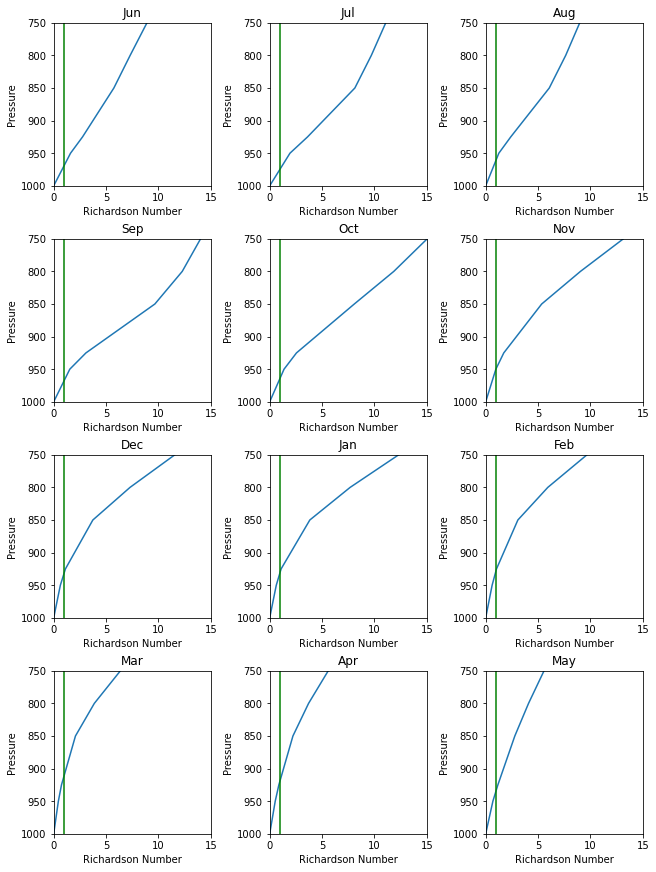

In [220]:
## monthly panels

def richardson_no_multiple_plots_grid():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(9, 12), constrained_layout=True)  
    
    data = rich_number_m

    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_nums = [5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4]

    month_num_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            data_idx = month_nums[month_num_idx]
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].plot(
                #cur_data.pressure,
                cur_data.values,
                cur_data.pressure,
                #levels=np.arange(-2.05, 2.1, 0.1),
            )
            
            ax[row, col].axvline(x=1, color='g')
            ax[row, col].set_title(month_labels[data_idx])
            ax[row, col].set_ylabel('Pressure')
            ax[row, col].set_xlabel('Richardson Number')
            ax[row, col].set_xlim(0, 15)
            ax[row, col].set_ylim(750, 1000)
            ax[row, col].invert_yaxis()
            month_num_idx += 1
    
    fig.patch.set_facecolor('white')
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/con_ri_no_invert_areaaveraged5.png')  

richardson_no_multiple_plots_grid()

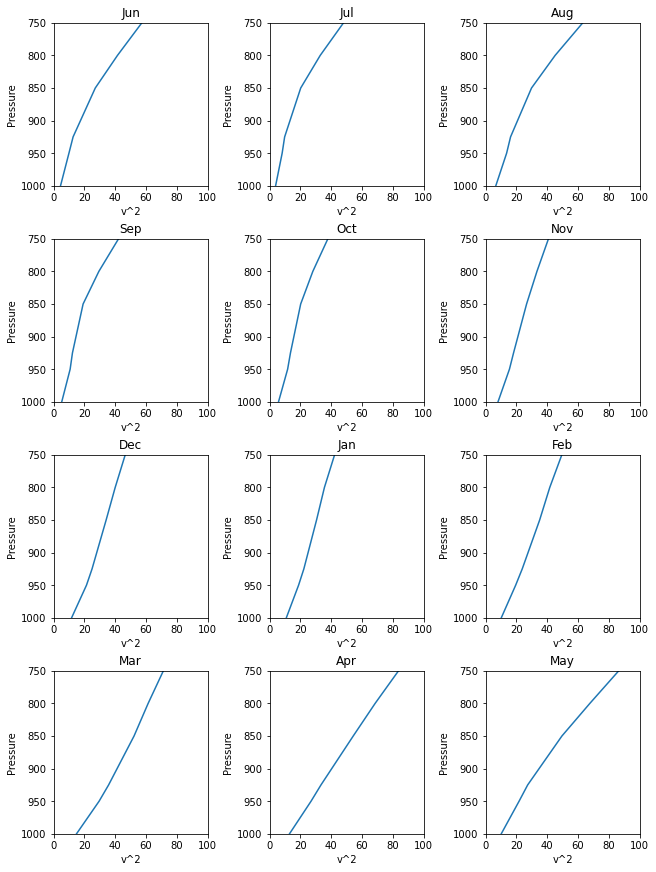

In [230]:
## monthly panels of vertical profile of v^2

def v2_multiple_plots_grid():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(9, 12), constrained_layout=True)  
    
    data = v_mean

    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_nums = [5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4]

    month_num_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            data_idx = month_nums[month_num_idx]
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].plot(
                #cur_data.pressure,
                cur_data.values,
                cur_data.pressure,
                #levels=np.arange(-2.05, 2.1, 0.1),
            )
            
            ax[row, col].set_title(month_labels[data_idx])
            ax[row, col].set_ylabel('Pressure')
            ax[row, col].set_xlabel('v^2')
            ax[row, col].set_xlim(0, 100)
            ax[row, col].set_ylim(750, 1000)
            ax[row, col].invert_yaxis()
            month_num_idx += 1
    
    fig.patch.set_facecolor('white')
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/con_v^2_abl.png')  

v2_multiple_plots_grid()

In [176]:
g = 9.8
def Ri (z, theta_con_monthly, xwind_con_monthly, ywind_con_monthly):
    theta_diff = theta_con_monthly - theta_con_monthly.sel(pressure=1000)
    v = xwind_con_monthly**2 + ywind_con_monthly**2
    rich = (g * z * theta_diff) / (theta_con_monthly.sel(pressure=1000) * v)
    return rich 

In [177]:
rich_no = Ri (z_out, theta_diff_out, xwind_con_monthly_3d, ywind_con_monthly_3d)

In [251]:
ri_no = []
for n in range(13):
    data1 = theta_con_monthly_3d.isel(month=n)
    data2 = xwind_con_monthly_3d.isel(month=n)
    data3 = ywind_con_monthly_3d.isel(month=n)
    data4 = z
    rich_no_xr = Ri (data4, data1, data2, data3)
    ri_no.append(rich_no_xr)

ValueError: operands could not be broadcast together with shapes (16,) (16, 30, 20)

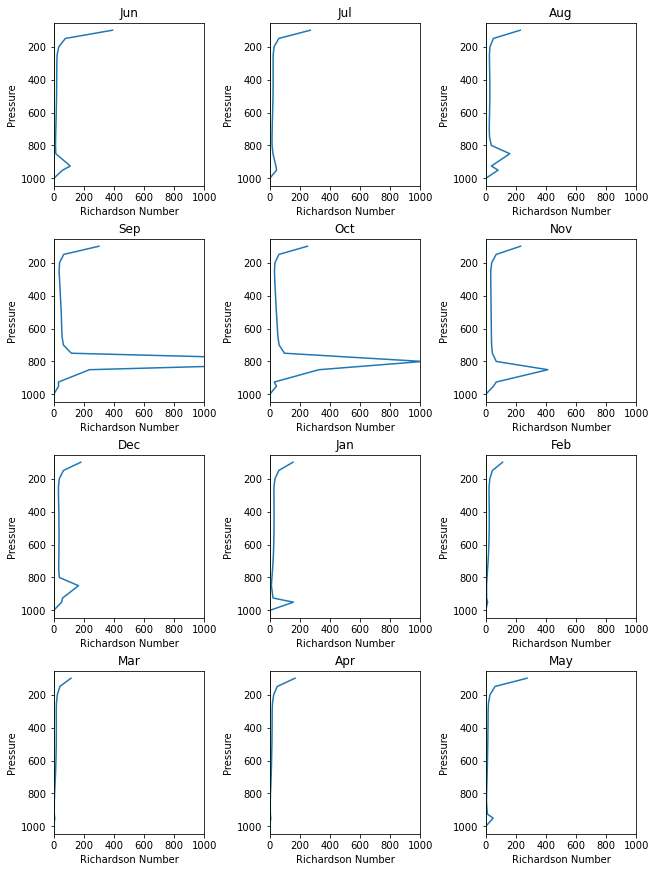